In [7]:
import pandas as pd
import os 

In [8]:
path = "/Volumes/LM_MG_drive_one/Morel_meta_analyses_transcriptomics/gene_overlap_analysis_B6vsTC_spTfh_mArrary_RNA-seq/result_tab/"
list_files = os.listdir(path)

In [9]:
csv_files = [x for x in list_files if ".csv" in x and ".ipynb" and "merged" not in x and "MLN" not in x and "Tn" not in x]

In [10]:
csv_files

['res_Microarray_Tfh_TCvsB6_112719corrected.csv', 'result_TCvsB6_r2_Tfh.csv']

In [11]:
labels = [x.split(".")[0].replace("result_","") for x in csv_files]
labels

['res_Microarray_Tfh_TCvsB6_112719corrected', 'TCvsB6_r2_Tfh']

In [12]:
df_l = []
i = 0
for item in csv_files:
    temp = pd.read_csv(path + item)
    temp.columns = ['Unnamed: 0'] + [labels[i] + "_" + x for x in temp.columns[1:]] 
    i+=1
    df_l.append(temp)

In [13]:
[x.columns for x in df_l]

[Index(['Unnamed: 0', 'res_Microarray_Tfh_TCvsB6_112719corrected_stat',
        'res_Microarray_Tfh_TCvsB6_112719corrected_padj',
        'res_Microarray_Tfh_TCvsB6_112719corrected_log2FC_TCvsB6'],
       dtype='object'),
 Index(['Unnamed: 0', 'TCvsB6_r2_Tfh_baseMean', 'TCvsB6_r2_Tfh_log2FoldChange',
        'TCvsB6_r2_Tfh_lfcSE', 'TCvsB6_r2_Tfh_stat', 'TCvsB6_r2_Tfh_pvalue',
        'TCvsB6_r2_Tfh_padj'],
       dtype='object')]

In [14]:
m_df = pd.DataFrame()
for x in df_l:
    if m_df.shape[0] ==0:
        m_df = x
    else:
        m_df = pd.merge(m_df,x,on ='Unnamed: 0')

In [15]:
m_df.to_csv("merged_res_df_only_TCvsB6_mArray_RNAseq.csv",index=False)

# 1st 2 gene lists

#### FC > 1.5 ; padj < 0.05

In [17]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2" in z]
    gene_dict.update({"padj0.05_log2FC_h1.5" + labels[i]: x.loc[((x[padj_n[0]]<0.05) & (x[FC_n[0]]>0.5849)),'Unnamed: 0'].tolist()})
    i = i+1

In [18]:
gene_dict.keys()

dict_keys(['padj0.05_log2FC_h1.5res_Microarray_Tfh_TCvsB6_112719corrected', 'padj0.05_log2FC_h1.5TCvsB6_r2_Tfh'])

In [19]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_padj0.05_FChigher1.5.txt', 'w')
out.write(s)
out.close()

In [20]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

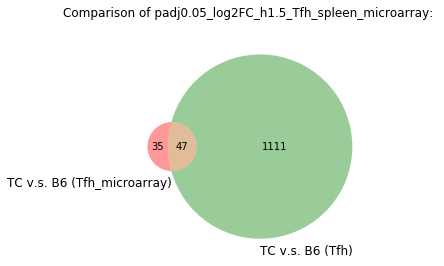

In [21]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = ("TC v.s. B6 (Tfh_microarray)",
                    "TC v.s. B6 (Tfh)"))

plt.title('Comparison of padj0.05_log2FC_h1.5_Tfh_spleen_microarray: \n')
plt.show()

f.savefig("Comparison of padj0.05_log2FC_h1.5_Tn_Tfh_spleen_microarray.pdf", bbox_inches='tight')

------------

#### FC < -1.5 ; padj < 0.05

In [23]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2" in z]
    gene_dict.update({"padj0.05_log2FC_l1.5" + labels[i]: x.loc[((x[padj_n[0]]<0.05) & (x[FC_n[0]]<-0.5849)),'Unnamed: 0'].tolist()})
    i = i+1

In [24]:
gene_dict.keys()

dict_keys(['padj0.05_log2FC_l1.5res_Microarray_Tfh_TCvsB6_112719corrected', 'padj0.05_log2FC_l1.5TCvsB6_r2_Tfh'])

In [25]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_padj0.05_FClower1.5.txt', 'w')
out.write(s)
out.close()

In [26]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

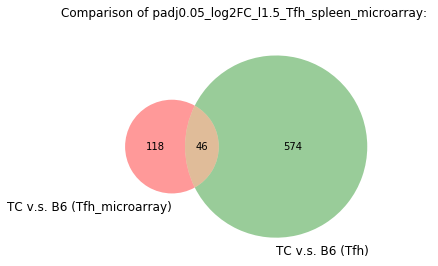

In [27]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = ("TC v.s. B6 (Tfh_microarray)",
                    "TC v.s. B6 (Tfh)"))

plt.title('Comparison of padj0.05_log2FC_l1.5_Tfh_spleen_microarray: \n')
plt.show()

f.savefig("Comparison of padj0.05_log2FC_l1.5_Tn_Tfh_spleen_microarray.pdf", bbox_inches='tight')

----------

# 2nd 2 gene lists

#### FC > 0; padj < 0.05

In [29]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2" in z]
    gene_dict.update({"padj0.05_log2FC_h0" + labels[i]: x.loc[((x[padj_n[0]]<0.05) & (x[FC_n[0]]>0)),'Unnamed: 0'].tolist()})
    i = i+1

In [30]:
gene_dict.keys()

dict_keys(['padj0.05_log2FC_h0res_Microarray_Tfh_TCvsB6_112719corrected', 'padj0.05_log2FC_h0TCvsB6_r2_Tfh'])

In [31]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_padj0.05_FChigher0.txt', 'w')
out.write(s)
out.close()

In [32]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

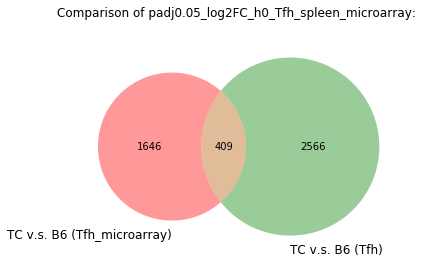

In [33]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = ("TC v.s. B6 (Tfh_microarray)",
                    "TC v.s. B6 (Tfh)"))

plt.title('Comparison of padj0.05_log2FC_h0_Tfh_spleen_microarray: \n')
plt.show()

f.savefig("Comparison of padj0.05_log2FC_h0_Tn_Tfh_spleen_microarray.pdf", bbox_inches='tight')

------------

# FC < 0 ; padj < 0.05

In [35]:
gene_dict = {}
res_l = []
i=0
for x in df_l:
    
    padj_n = [y for y in x.columns if "padj" in y]
    FC_n = [z for z in x.columns if "log2" in z]
    gene_dict.update({"padj0.05_log2FC_l0" + labels[i]: x.loc[((x[padj_n[0]]<0.05) & (x[FC_n[0]]<0)),'Unnamed: 0'].tolist()})
    i = i+1

In [36]:
gene_dict.keys()

dict_keys(['padj0.05_log2FC_l0res_Microarray_Tfh_TCvsB6_112719corrected', 'padj0.05_log2FC_l0TCvsB6_r2_Tfh'])

In [37]:
[str(k) + "  " +str(len(v)) for k,v in gene_dict.items()]

s = ""
for k,v in gene_dict.items():
        s +=  k + "\t"
        s += ("\t").join(v) + "\n"        

out = open('gene_lists_padj0.05_FClower0.txt', 'w')
out.write(s)
out.close()

In [38]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

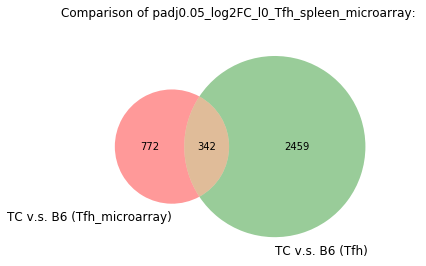

In [39]:
#Looking only in spleen
f = plt.figure()

venn2([set(gene_dict[list(gene_dict.keys())[0]]),
       set(gene_dict[list(gene_dict.keys())[1]])], #set(gene_dict[list(gene_dict.keys())[3]])
      set_labels = ("TC v.s. B6 (Tfh_microarray)",
                    "TC v.s. B6 (Tfh)"))

plt.title('Comparison of padj0.05_log2FC_l0_Tfh_spleen_microarray: \n')
plt.show()

f.savefig("Comparison of padj0.05_log2FC_l0_Tn_Tfh_spleen_microarray.pdf", bbox_inches='tight')